In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import pickle
from functools import reduce
from dateutil.relativedelta import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import sys 
#sys.path.append('D:/sciebo/Montreal/Code/')
#sys.path.append('D:/sciebo/Montreal/Code/ERC_data_helpers/')
#import ERC_data_helpers as ERC
from datetime import datetime as dt
import datetime
from dateutil.relativedelta import *

In [2]:
from helpers import load, plot, analyse
from helpers.plot import ERC_Management

In [3]:
ERC_Management().set_plot_params()
fig_width = 6.33

#### Example plot

In [4]:
## Load data
start_date = '2023-03-01 01:00:00' #gut um nans zu zeigen
end_date = '2023-03-31 02:05:00'
data = load.load_data(start_date, end_date, masked=True, data_type='raw')

In [5]:
# Calculate the median of each of the six
treshold_in = 0.12
treshold_out = 0.24
misfit_dict_in, medians_in = analyse.get_vault_outliers_median_filter(data, after='_T_in', threshold=treshold_in)
misfit_dict_out, medians_out = analyse.get_vault_outliers_median_filter(data, after='_T_out', threshold=treshold_out)

misfit_dict_in, misfit_dict_out

({'Probe_26_T_in': 0.2442542557002787,
  'Probe_29_T_in': 0.358230691890743,
  'Probe_33_T_in': 0.36765037963272307,
  'Probe_35_T_in': 0.14542661011659136,
  'Probe_13_T_in': 0.6030460759724241},
 {'Probe_13_T_out': 0.33841296760703815})

#### Für die Abbildung
Südschacht zeigen, da haben wir beide Fälle dabei: komplett draußen und leichter Versatz. Die anderen erwischen wir dann noch im Februar, bzw. wenn wir sehen dass sie wieder reingesteckt wurden.

In [6]:
## Load data
start_date = '2023-03-04 01:00:00' #gut um nans zu zeigen
end_date = '2023-03-22 02:05:00'
data = load.load_data(start_date, end_date, masked=True, data_type='raw')
# Resample data
data = data.resample('300s').mean().round(2)

# Calculate the median of each of the six
treshold_in = 0.12
treshold_out = 0.24
misfit_dict_in, medians_in = analyse.get_vault_outliers_median_filter(data, after='_T_in', threshold=treshold_in)
misfit_dict_out, medians_out = analyse.get_vault_outliers_median_filter(data, after='_T_out', threshold=treshold_out)

data['med_T_in_west'] = medians_in['med_west']
data['med_T_in_east'] = medians_in['med_east']
data['med_T_in_south'] = medians_in['med_south']

data['med_T_out_west'] = medians_out['med_west']
data['med_T_out_east'] = medians_out['med_east']
data['med_T_out_south'] = medians_out['med_south']

In [7]:
plot_colors = {'west_b': '#7393B3', 'south_b': '#6F4E37', 'east_b': '#5F8575',  
               'west_m': '#89CFF0', 'south_m': '#A52A2A', 'east_m': '#AFE1AF'} #alpha=.3

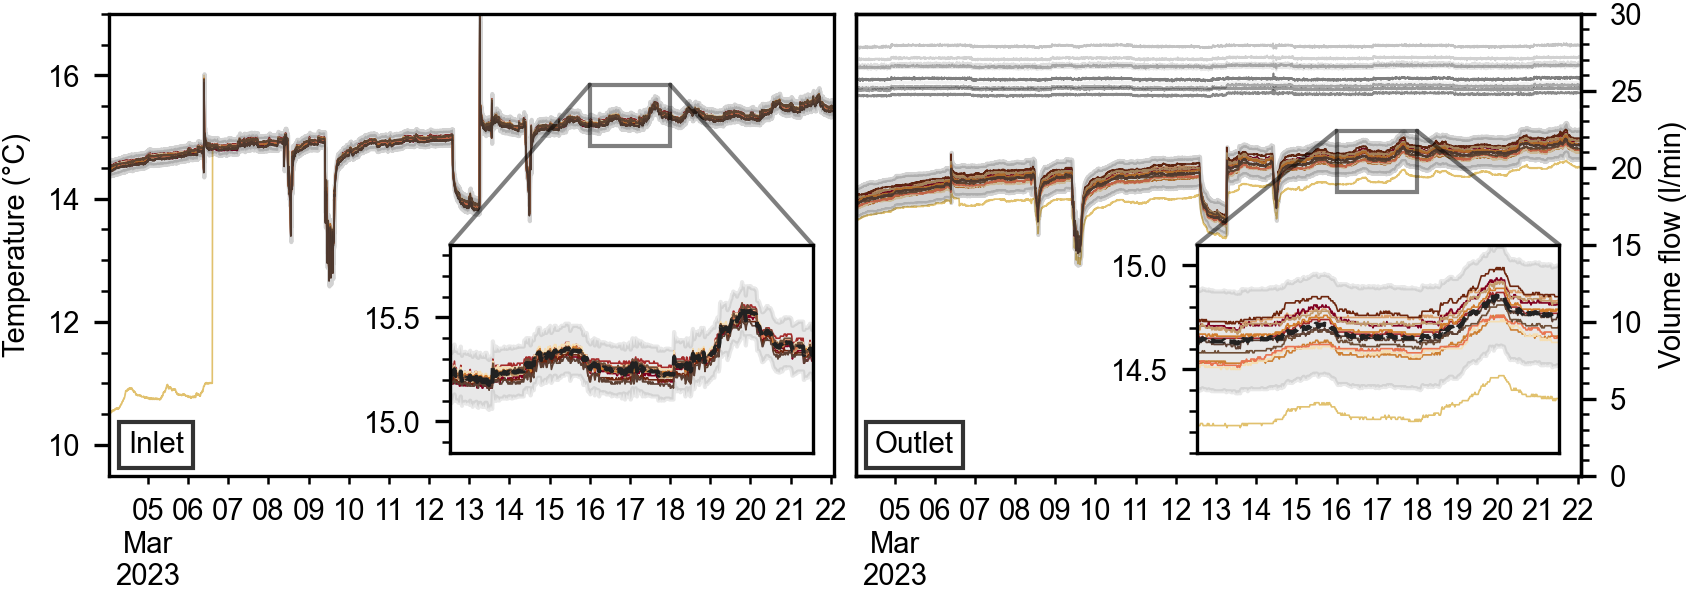

In [23]:
# Create subplots with shared y-axis
fig, ax = plt.subplots(1, 2, figsize=(fig_width, 2), dpi=300, sharey=True)
lw = 0.4  # Line width for plots

# Initialize the management class and set plot parameters
m = ERC_Management()
m.set_plot_params()

# Create color dictionary
all_color_dict = m.create_colordict()

# Generate vault ID strings for different metrics
west_in, south_in, east_in = m.generate_vault_id_strings(after='_T_in')
west_out, south_out, east_out = m.generate_vault_id_strings(after='_T_out')
west_vdot, south_vdot, east_vdot = m.generate_vault_id_strings(after='_V_dot')

### Plot the raw data
# Plot inlet temperatures
data.plot(ax=ax[0], y=south_in, color=[all_color_dict.get(x, 'k') for x in south_in], legend=False, xticks=[], xlabel="", linewidth=lw, zorder=0)
# Plot outlet temperatures
data.plot(ax=ax[1], y=south_out, color=[all_color_dict.get(x, 'k') for x in south_in], legend=False, linewidth=lw, zorder=0)

# Create a twin y-axis for volume flow on the second subplot
ax2 = ax[1].twinx()
ax2.set_ylim(0, 30)
# Plot volume flow data
data.plot(ax=ax2, y=south_vdot, cmap='Greys', legend=False, xticks=[], xlabel="", linewidth=lw, alpha=.5)
ax2.set_ylabel('Volume flow (l/min)')

# Plot the medians and thresholds
#data.plot(ax=ax[0], y=['med_T_in_south'], color='#222222', linewidth=lw, linestyle='--', legend=False)
#data.plot(ax=ax[1], y=['med_T_out_south'], color='#222222', linewidth=lw, linestyle='--', legend=False)
ax[0].fill_between(data.index, (data['med_T_in_south'] - treshold_in), (data['med_T_in_south'] + treshold_in), color='#222222', alpha=.2, label='threshold')
ax[1].fill_between(data.index, (data['med_T_out_south'] - treshold_out), (data['med_T_out_south'] + treshold_out), color='#222222', alpha=.2, label='threshold')

# Set labels and titles
ax[0].set_ylabel('Temperature (°C)')
ax[1].axes.get_yaxis().set_visible(False)
ax[0].set_ylim(9.5, 17)

# Inset axes for detailed view of inlet temperatures
axins = ax[0].inset_axes([0.47, 0.05, 0.5, 0.45])  # Position and size of inset axes
x1, x2, y1, y2 = '2023-03-16 00:00:00', '2023-03-18 00:00:00', 14.85, 15.85
data.plot(ax=axins, y=south_in, color=[all_color_dict.get(x, 'k') for x in south_in], legend=False, xticks=[], xlabel="", linewidth=lw)#, alpha=.5)
data.plot(ax=axins, y=['med_T_in_south'], color='#222222', linewidth=1, linestyle='--', legend=False)
axins.fill_between(data.index, (data['med_T_in_south'] - treshold_in), (data['med_T_in_south'] + treshold_in), color='#222222', alpha=.1, label='threshold')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([], minor=True)
axins.set_xticks([])
axins.set_xlabel('')
ax[0].indicate_inset_zoom(axins, edgecolor="black")
ax[1].set_xlabel('')

# Inset axes for detailed view of outlet temperatures
axins = ax[1].inset_axes([0.47, 0.05, 0.5, 0.45])  # Position and size of inset axes
x1, x2, y1, y2 = '2023-03-16 00:00:00', '2023-03-18 00:00:00', 14.1, 15.1
data.plot(ax=axins, y=south_out, color=[all_color_dict.get(x, 'k') for x in south_in], legend=False, linewidth=lw)#, alpha=.5)
data.plot(ax=axins, y=['med_T_out_south'], color='#222222', linewidth=1, linestyle='--', legend=False)
axins.fill_between(data.index, (data['med_T_out_south'] - treshold_out), (data['med_T_out_south'] + treshold_out), color='#222222', alpha=.1, label='threshold')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([], minor=True)
axins.set_xticks([])
axins.set_xlabel('')
ax[1].indicate_inset_zoom(axins, edgecolor="black")
ax[0].annotate('Inlet', xy = ['2023-03-05 05:00:00',10], va='center', ha='center', fontsize=7.1,zorder=1001,
                 bbox=dict(facecolor='white', alpha=.8, edgecolor='k', boxstyle='square'))
ax[1].annotate('Outlet', xy = ['2023-03-05 12:00:00',10], va='center', ha='center', fontsize=7.1,zorder=1001,
                 bbox=dict(facecolor='white', alpha=.8, edgecolor='k', boxstyle='square'))

# Adjust layout and save figure
fig.subplots_adjust(wspace=0.03, hspace=0.1)
fig.savefig('Outliers_Vault2.pdf', bbox_inches='tight')
